# Project: No-Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset used for this "no-show appointment data analysis" was information gattered from more than a hundred thousand of medical appointments that happened in South America, specifically Brazil and this dataset details the patient show for the appointment or not show for the appointment booked with medical practitioners. This dataset has the following column names: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, and No-show. Nonetheless, the number of characteri
A number of characteristics about the patient are included in each row: as follw

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
'Age" indicates the patient age's group when they booked for their appointment.


### Research Questions for Analysis
From the dataset tat would be used for data analysis, my no-show appointment analysis would have four key questions to be analysed as the answers to these questions. The questions are:
1. Find the relationship between age and showing up for medical appointment (no show)?
2. What gender has high number of no-show and show?
3. Did those patients that receive SMS show up for the appointment or now?
4. What is the relationship between No show and scholarship?
5. What is the relationship between hypertension and Diabetes?
6. What is the relationship between Alcoholism and Diabetes?
7. What is the relationship between Alcoholism and Hipertension?
8. What is the relationship between Age and Hipertension?

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.6MB/s eta 0:00:01   22% |███████                         | 2.3MB 13.5MB/s eta 0:00:01    40% |████████████▉                   | 4.2MB 13.7MB/s eta 0:00:01    62% |████████████████████            | 6.5MB 14.2MB/s eta 0:00:01    68% |█████████████████████▉          | 7.1MB 14.1MB/s eta 0:00:01    79% |█████████████████████████▋      | 8.4MB 14.3MB/s eta 0:00:01    91% |█████████████████████████████▍  | 9.6MB 20.2MB/s eta 0:00:01    97% |███████████████████████████████▎| 10.2MB 13.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.2MB/s eta 0:00:01  4% |█▌                              | 645kB 12.6MB/s eta 0:00:02    26% |████████▋                       | 3.6MB 12.8MB/s eta 0:00:01    31% |██████████                      | 4.2MB 12.3MB/s eta 0:00:01    39% |████████████▊                   | 5.3MB 11.8MB/s eta 0:00:01    43% |██████████████                  | 5.8MB 13.6MB/s eta 0:00:01    47% |███████████████▎         

In [1]:
# Import the important packages needed for the no-show appointment data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#Load the data needed for the analysis and show the first 5
data = pd.read_csv('No Show Appointment.csv')
print(data.head(n=10))

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5  9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6  7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7  3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8  5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9  7.812456e+13        5629123      F  2016-04-27T12:48:25Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0            

In [3]:
#Find the data dimension of this no show appointment dataset
data.shape

(110527, 14)

In [4]:
#Show the data information of this no show appointment dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Show the summary statistics of the dataset especially the numeric columns
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


***The summary statistics above shows the summarised statistics of the data information in the dataset. It is important to know that most of the data shown - except age - are barely meaningful since that they are encoded to represent the presence of particular instance or its absence. While the age being only the numeric and meaningful data in the dataset, the minimum age as seen from the data is -1 and maximum age being 115 with a mean and median of 37 and this suggests that the age data looks like normal distributed curve***

In [6]:
#Checking for missing values before proceeding with our exploration
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

##### It is evident that no column missing value

#### Translating the encoding letter and number into their full meaning in the dataset to be used for exploratory analysis. 

In [8]:
#Converting M and F in Gender column of dataset into Male and Female             
data.Gender = data.Gender.map({ 'M' : 'Male', 'F' : 'Female'})
#Show new dataframe
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#Converting 0 and 1 in SMS_received of dataset into SMS Received and SMS Not Received             
data.SMS_received = data.SMS_received.map({ 1 : 'SMS Received', 0 : 'SMS Not Received'})
#Show new dataframe
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,Female,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,SMS Not Received,No
1,5.589978e+14,5642503,Male,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,SMS Not Received,No
2,4.262962e+12,5642549,Female,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,SMS Not Received,No
3,8.679512e+11,5642828,Female,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,SMS Not Received,No
4,8.841186e+12,5642494,Female,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,SMS Not Received,No


In [10]:
#dropping the unused columns in the dataset or columns that we won't be using further in our analysis
data.drop(['PatientId', 'AppointmentID','AppointmentDay','ScheduledDay'], axis=1, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null object
No-show          110527 non-null object
dtypes: int64(6), object(4)
memory usage: 8.4+ MB


#### From the data analysis process performed so far, it is obvious that our dataset has been shrinkled to four columns. These four columns are used to answers the questions we have earlier raised as the data has been cleaned and well prepared for the analysis that comes next

<a id='eda'></a>
## Exploratory Data Analysis

### Find the relationship between age and showing up for medical appointment (no show)?


### There are functions that we would continue to use make use of in this analysis in our exploration section so as to avoid repetition of similar code in our analysis.

In [25]:
#Create groupy table function to tabulate the no show against the selected features questions
def g_table(w,x,y):
    tab=w.groupby(x)[y].value_counts(normalize=True).unstack(x).mul(100)
    '''This function groups the w by x columns into a matrix form and show the each unique values in y in another column
     and the next columns shows the number of items each unique value against the group values of x. 
     This is then convertedto 1-scale against each unique item in x and then multiply by 100'''
    return (tab)

In [30]:
#Create a bar plot function to visualize the research questions raised.
def br_plot(g_table,a,b):
    p=g_table.plot.bar(figsize=[a,b], rot=2)
    """This function use the group table obtained from g_table to create a visual plot that show the relationship between
    no-show, our variable of interest, and the selected variables as the plot shows the proportion of no-show in each
    unique items"""
    return p

In [17]:
#To create a Boxplot function to examine the distribution of two variables (discrete and continous)
def bx_plot(x,y,z):
    q=sns.boxplot(x = x, y = y, data=z) #To define the arguments that would be used to display Box Plot
    return q

In [18]:
#To create a scatterplot function to examine the distribution of two variables (discrete)
def st_plot(w,x,y):
    st=w.plot.scatter(x=x,y=y, title='Relationship between ' + x +' and '+y)
    """This function is depict the relationship between x and y variables on a scatter plot, and 
    then return a graphical representation of these factors"""
    plt.show(block=True)
    return st

In [19]:
data.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

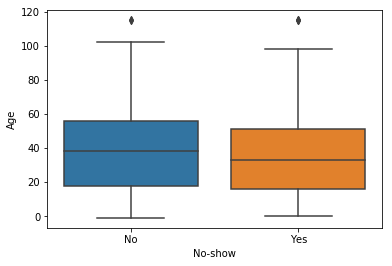

In [20]:
#To display the age and showing up for medical appointment in boxplot
bx_plot('No-show', 'Age', data)

###### From the boxplot of relationship of between age and no-show, it is evident that those that show up for the appointment are between the age of 20 and 58, and these are found between 2nd and 4th quarter. And those that did not show up are between the 18 and 55. This  plot however shows the outliers in age which is above 100

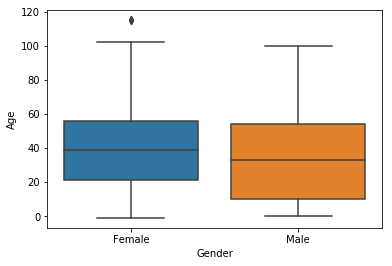

In [21]:
#To display the box and whisker plot of age against Gender
bx_plot('Gender', 'Age', data)

###### From the boxplot of relationship of between age and gender,  the sample female genders are between age of 20 and 55 while the male genders are between age of 15 and 53 in their 2nd and 4th quarter. However,  this plot the outliers  earlier found in age came from female genders.

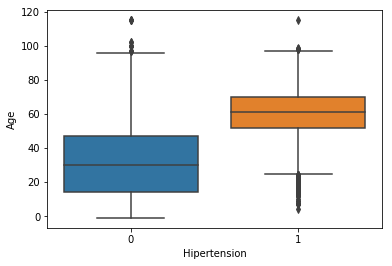

In [22]:
#To display the age and showing up for medical appointment in boxplot
bx_plot('Hipertension', 'Age', data)

###### As seen above from the figure, the 2nd and 4th quarter of those who have hipertenson are between 46 and 65, and while those that do not have have their 2nd and 4th quarter between 16 and 45 years of age.

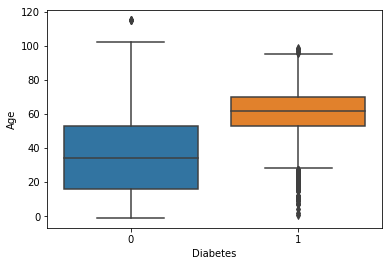

In [21]:
sns.boxplot(x = "Diabetes", y = "Age", data=data)

###### As seen above from the figure, the 2nd and 4th quarter of those who have diabetes are between 48 and 65, and while those that do not have have their 2nd and 4th quarter between 18 and 46 years of age.

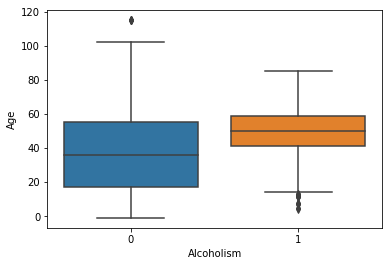

In [22]:
sns.boxplot(x = "Alcoholism", y = "Age", data=data)

###### As seen above from the figure, the 2nd and 4th quarter of those who drink or consume alcoholic drinks are between 40 and 58, and while those that do not drink have their 2nd and 4th quarter between 18 and 57 years of age.

### What gender has high number of no-show and show?


In [35]:
# Show the percentage in each gender that show up for medical appointment and the ones that did not
gen=g_table(data, 'Gender', 'No-show')
gen

Gender,Female,Male
No-show,,
No,79.685412,80.032052
Yes,20.314588,19.967948


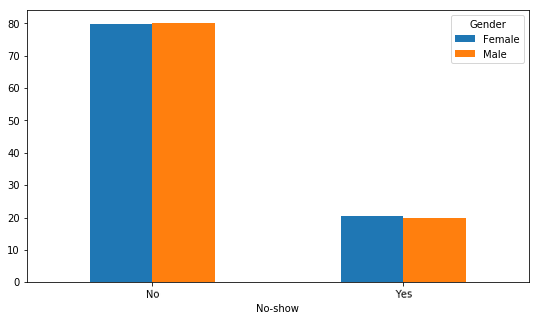

In [37]:
#Show the bar plot of Gender for No Show
br_plot(gen, 9,5)

#### From the table, and plot above, 79.68% of female and 80.03% of male did show up for medical appointment while about 20.31% of female and 19.97% of male did not show up for medical appointment. 

### Did those patients that receive SMS show up for the appointment or now?

In [38]:
#Show the percentage of those receive the SMS and thos who did not and show up for the appointment
SMS=g_table(data, 'SMS_received', 'No-show')
SMS

SMS_received,SMS Not Received,SMS Received
No-show,,
No,83.296689,72.425455
Yes,16.703311,27.574545


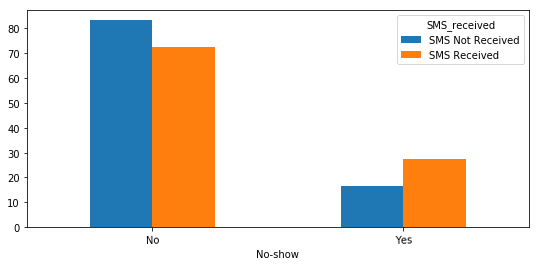

In [40]:
# Use the bar charts to show whether those that received SMS show up or not.
#Show the bar plot of Gender for No Show
br_plot(SMS, 9,4)

#### From the table and bar plot above, 83.30% of those who did not receive an SMS showed up for the appointment and 16.70% of that that did not receive SMS did not show up. Furthermore, About 72% received an SMS and showed up for the apointment while the remaing 27.57% of those that received SMS that did SMS did not show up for medical appointment.                                 

##### What is the relationship between No show and scholarship?


In [46]:
#Tabulate how scholarship relates with no-show
sch=g_table(data, 'Scholarship', 'No-show')
sch

Scholarship,0,1
No-show,,
No,80.192844,76.263696
Yes,19.807156,23.736304


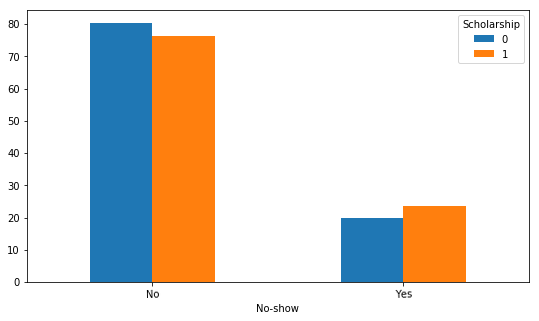

In [47]:
br_plot(sch, 9,5)

#### From the perception of those that did not receive scholarship, 80.19% of them show up while 19.80% did not show up. While the 76.26% of those that received scholarship showed up for the medical appointment and remaining 23.73% did not show up.

#### What is the relationship between hypertension and Diabetes?


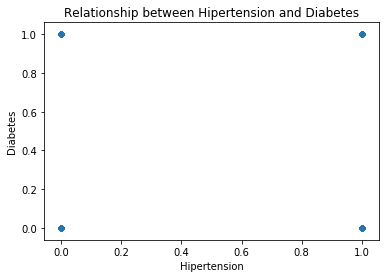

In [48]:
st_plot(data, 'Hipertension', 'Diabetes')

#### What is the relationship between Alcoholism and Diabetes?


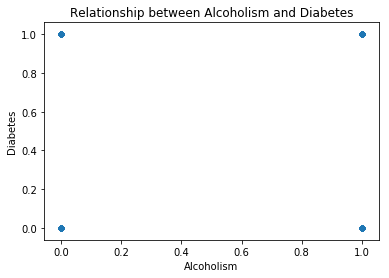

In [52]:
st_plot(data, 'Alcoholism', 'Diabetes')

***The scatter plot above show the relationship between Alcoholism and Diabetes, and this there are some patient drink alcohol but do not have diabetes, and some do drinks and have diabetes. while neither drink nor have diabetes***


#### What is the relationship between Alcoholism and Hipertension?

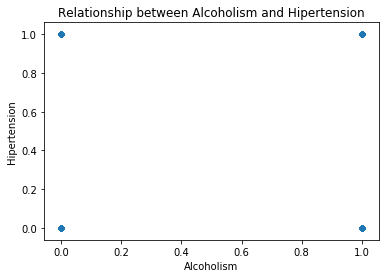

In [51]:
st_plot(data, 'Alcoholism', 'Hipertension')

***The scatter plot above show the relationship between Alcoholism and hipertension, and this there are some patient drink alcohol but do not have hipertension, and some do drinks and have diabetes. while neither drink nor have hipertension***


<a id='conclusions'></a>
## Conclusions
**This no show medical appointment data analysis used the dataset that contains 110,527 observations and 14 dinstinct features to answer some questions which were earlier raised so as to provide the insights for actionable information. It is evident from the that exploratory data analysis performed that a lot of patient who showed up for the medical appointment in Brazil were female  and while men seemed to have low turn-out. This may not be gender-specific as more female genders were captured in comparison with male genders.**

**Furthermore, the insights gleened from the exploratory analysis shows receiving SMS does not suggest that medical patients will show up for medical appointments as the 88,208 that showed up for the medical appointments did not receive any SMS with respect to their medical appointments. And as seen from the insights to the last research question raised, the tendencies to show for any medical appointment are sparcely around the multitudes of neighbourhood and that can come from any neighbourhoods.**

## Limitations

**However, in carry out the exploratory data analysis, there were some limitations encountered to be able to further insights from the dataset and the limitations such distance from patient's resident to medical's address, severity of the illiness, the patients' incomes et cetera prevented us from harvesting as much as possible insights from the dataset in addition to the majority of the dataset features being nominal and ordinal data.**

**Further limitations encountered in the course of analysing this problem was that given that the dataset were mostly nominal and categorical, bivarate or multiple analysis such as correlation, simple linear regression et cetera. Besides, the no show appointment dataset might have been collected using either probabilistic sample or non-probabilistic sample and either of this would impact the conclusion drawn from the dataset**

**Nonetheless, it is important to note that use of machine learning algorithms (whether supervised or unsupervised) are out of scope of this data analysis as well as not simple to complex statistical inferential tools. Therefore, in this analysis we did not draw any conclusion with respect to X happening because of Y - that is, cause and effect.**



## Thank you for your time.

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0